<a href="https://colab.research.google.com/github/Annmodels/mnist_recon/blob/master/Cv_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2 
import numpy as np
import time,pandas
from datetime import datetime

In [0]:
from google.colab.patches import cv2_imshow

In [0]:
from google.colab import files
uploaded = files.upload()


Saving Kite.mp4 to Kite.mp4


In [0]:
#!cd /content
#!ls -a

In [0]:
#imgc  = cvo.imread("/content/prg.jpeg",1)
img = cv2.imread("prg.jpeg",0)

In [0]:
print(type(img))
print(imgc.shape)
print(img)
print(img.shape)

In [0]:
img = cv2.imread('prg.jpeg',cv2.IMREAD_UNCHANGED)
resized = cv2.resize(img,(int(img.shape[0]/2),int(img.shape[1]/4)))


cv2_imshow(resized)
#fc = cv2.CascadeClassifier('https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml')
fc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#fc = cv2.CascadeClassifier('opencv\data\haarcascades\lbpcascade_frontalface.xml')
#fc = cv2.CascadeClassifier('data/haarcascades/haarcascade_frontalface_alt.xml')
#fc = cv2.CascadeClassifier('lbpcascade_frontalface.xml')
#print(fc)
faces = fc.detectMultiScale(resized,scaleFactor = 1.05,minNeighbors = 5)
print(faces)
for x,y,w,h in faces:
  imgf = cv2.rectangle(resized,(x,y),(x+w,y+h),(0,255,0),3)
  #imgf = cv2.resize(imgf,(int(imgf.shape[0]),int(imgf.shape[1])))
  cv2_imshow(imgf)


#cvo.waitKey(2000)
#cvo.destroyAllWindows()

In [0]:
#!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
#import cv2
#img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
#cv2_imshow(img)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
0 0 761 182


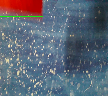

29
39 0 767 325


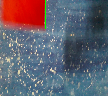

30
53 105 120 138


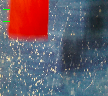

339 0 530 425


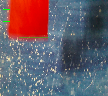

31
169 195 701 332


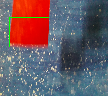

32
160 194 115 312


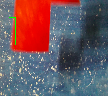

222 83 676 522


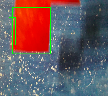

1024 0 387 49


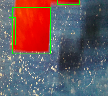

33
221 410 92 152


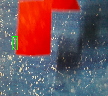

261 156 79 252


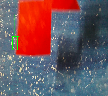

280 149 626 489


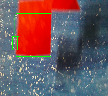

920 25 481 96


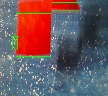

34
305 587 597 93


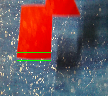

923 101 478 65


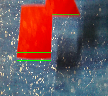

35
298 349 112 296


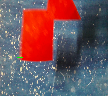

369 214 585 494


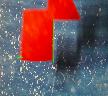

953 159 432 61


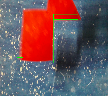

36
914 216 476 476


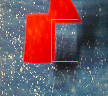

37
414 697 513 43


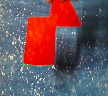

968 256 394 274


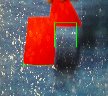

38
409 454 85 263


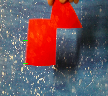

976 294 397 282


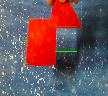

39
40
41
42
43
44
45
46
47
48
49
50
348 634 537 56


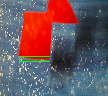

919 246 431 77


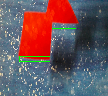

51
336 605 544 71


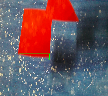

915 217 446 68


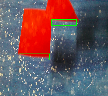

52
331 573 552 76


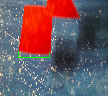

932 173 432 72


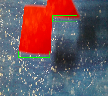

53
592 557 322 63


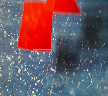

935 127 450 86


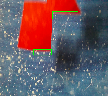

54
311 500 589 79


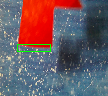

956 69 484 90


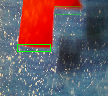

55
316 404 607 139


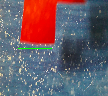

920 77 71 414


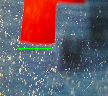

1001 16 455 77


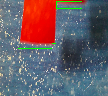

56
529 428 455 87


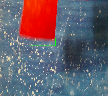

1055 0 446 45


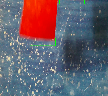

57
359 304 626 155


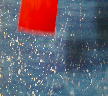

324 0 103 298


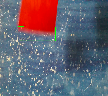

58
319 97 696 302


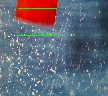

59
259 110 726 174


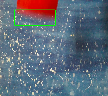

60
302 0 726 203


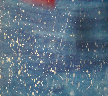

61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86


In [0]:
video = cv2.VideoCapture("Kite.mp4")
a = 0
check = False
frame = None
#eck,frame = video.read()

while (video.isOpened()):
  a += 1
  print(a)
  check,frame = video.read()
  if check == False:
    break
    #print(check)
  #cv2.imwrite('./'+str(a)+'.jpg',frame)
  gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  gray = cv2.GaussianBlur(gray,(21,21),0)
  
  if a == 1:
    prevframe = gray
    continue
  
  delta = cv2.absdiff(prevframe,gray)
  th = cv2.threshold(delta,30,255,cv2.THRESH_BINARY)[1]
  th = cv2.dilate(th,None,iterations = 0)
  (_cnts,_) = cv2.findContours(th.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  for contour in _cnts:
    if cv2.contourArea(contour) < 7000:
     # print("mini")
      continue
    (x,y,w,h) = cv2.boundingRect(contour)
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),5)
    print(x,y,w,h)
    cv2_imshow(cv2.resize(frame,(int(frame.shape[0]/10),int(frame.shape[1]/20))))
  prevframe = gray
  #cv2.waitKey(500)
 # if a == 53:
  #  print(check)
  #  break
  #prevframe = gray
  
     
  #if a == 130:
  #  print("error")
  # print(frame)
   # break
#for x in range(a):
 # x += 1
 # nm = str(x)+'.jpg'
 # print(nm)
  #img = cv2.imread(nm)
  #img = cv2.resize(img,(int(img.shape[0]/10),int(img.shape[1]/10)))
  #cv2_imshow(img)

video.release()
cv2.destroyAllWindows()
